## Import Important Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Gathering and validation

In [56]:
df_train=pd.read_csv(r"C:\Users\Tejas\Desktop\Newbiron\CMaps\train_FD001.txt",
                     sep=' ',index_col=False,header=None)

In [57]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [58]:
train1=df_train.copy()

In [59]:
train1.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [60]:
df_test =pd.read_csv(r"C:\Users\Tejas\Desktop\Newbiron\CMaps\test_FD001.txt",
                     sep=' ',index_col=False,header=None)

In [61]:
test=df_test.copy()

In [62]:
y_valid =pd.read_csv(r"C:\Users\Tejas\Desktop\Newbiron\CMaps\RUL_FD001.txt",
                     sep=' ',index_col=False,names=['RUL'],header=None) 

#### Defining features names

In [63]:
train=train1.rename(columns={0:"unit_number",1:"time_cycles",2:"setting_1",3:"setting_2",
                             4:"setting_3",5:"s_1",6:"s_2",7:"s_3",8:"s_4",9:"s_5",10:"s_6"
                             ,11:"s_7",12:"s_8",13:"s_9",14:"s_10",15:"s_11",16:"s_12",17:"s_13",
                             18:"s_14",19:"s_15",20:"s_16",21:"s_17",22:"s_18",23:"s_19",
                             24:"s_20",25:"s_21",
                            })

In [64]:
train.drop([26,27],axis=1,inplace=True)

In [65]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [66]:
test=test.rename(columns={0:"unit_number",1:"time_cycles",2:"setting_1",3:"setting_2",
                             4:"setting_3",5:"s_1",6:"s_2",7:"s_3",8:"s_4",9:"s_5",10:"s_6"
                             ,11:"s_7",12:"s_8",13:"s_9",14:"s_10",15:"s_11",16:"s_12",17:"s_13",
                             18:"s_14",19:"s_15",20:"s_16",21:"s_17",22:"s_18",23:"s_19",
                             24:"s_20",25:"s_21",
                            })

In [67]:
test.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [68]:
df_test.shape

(13096, 28)

## EDA (Exploratory Data Anylysis )

In [69]:
train.head()  #

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [70]:
test.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [72]:
train.isna().sum()

unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

In [73]:
train.loc[:,["unit_number","time_cycles"]].describe()

,unit_number,time_cycles
count,20631.000000,20631.000000
mean,51.506568,108.807862
std,29.227633,68.880990
min,1.000000,1.000000
25%,26.000000,52.000000
50%,52.000000,104.000000
75%,77.000000,156.000000
max,100.000000,362.000000


In [74]:
train.loc[:,"s_1":].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
s_7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
s_8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
s_9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
s_10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


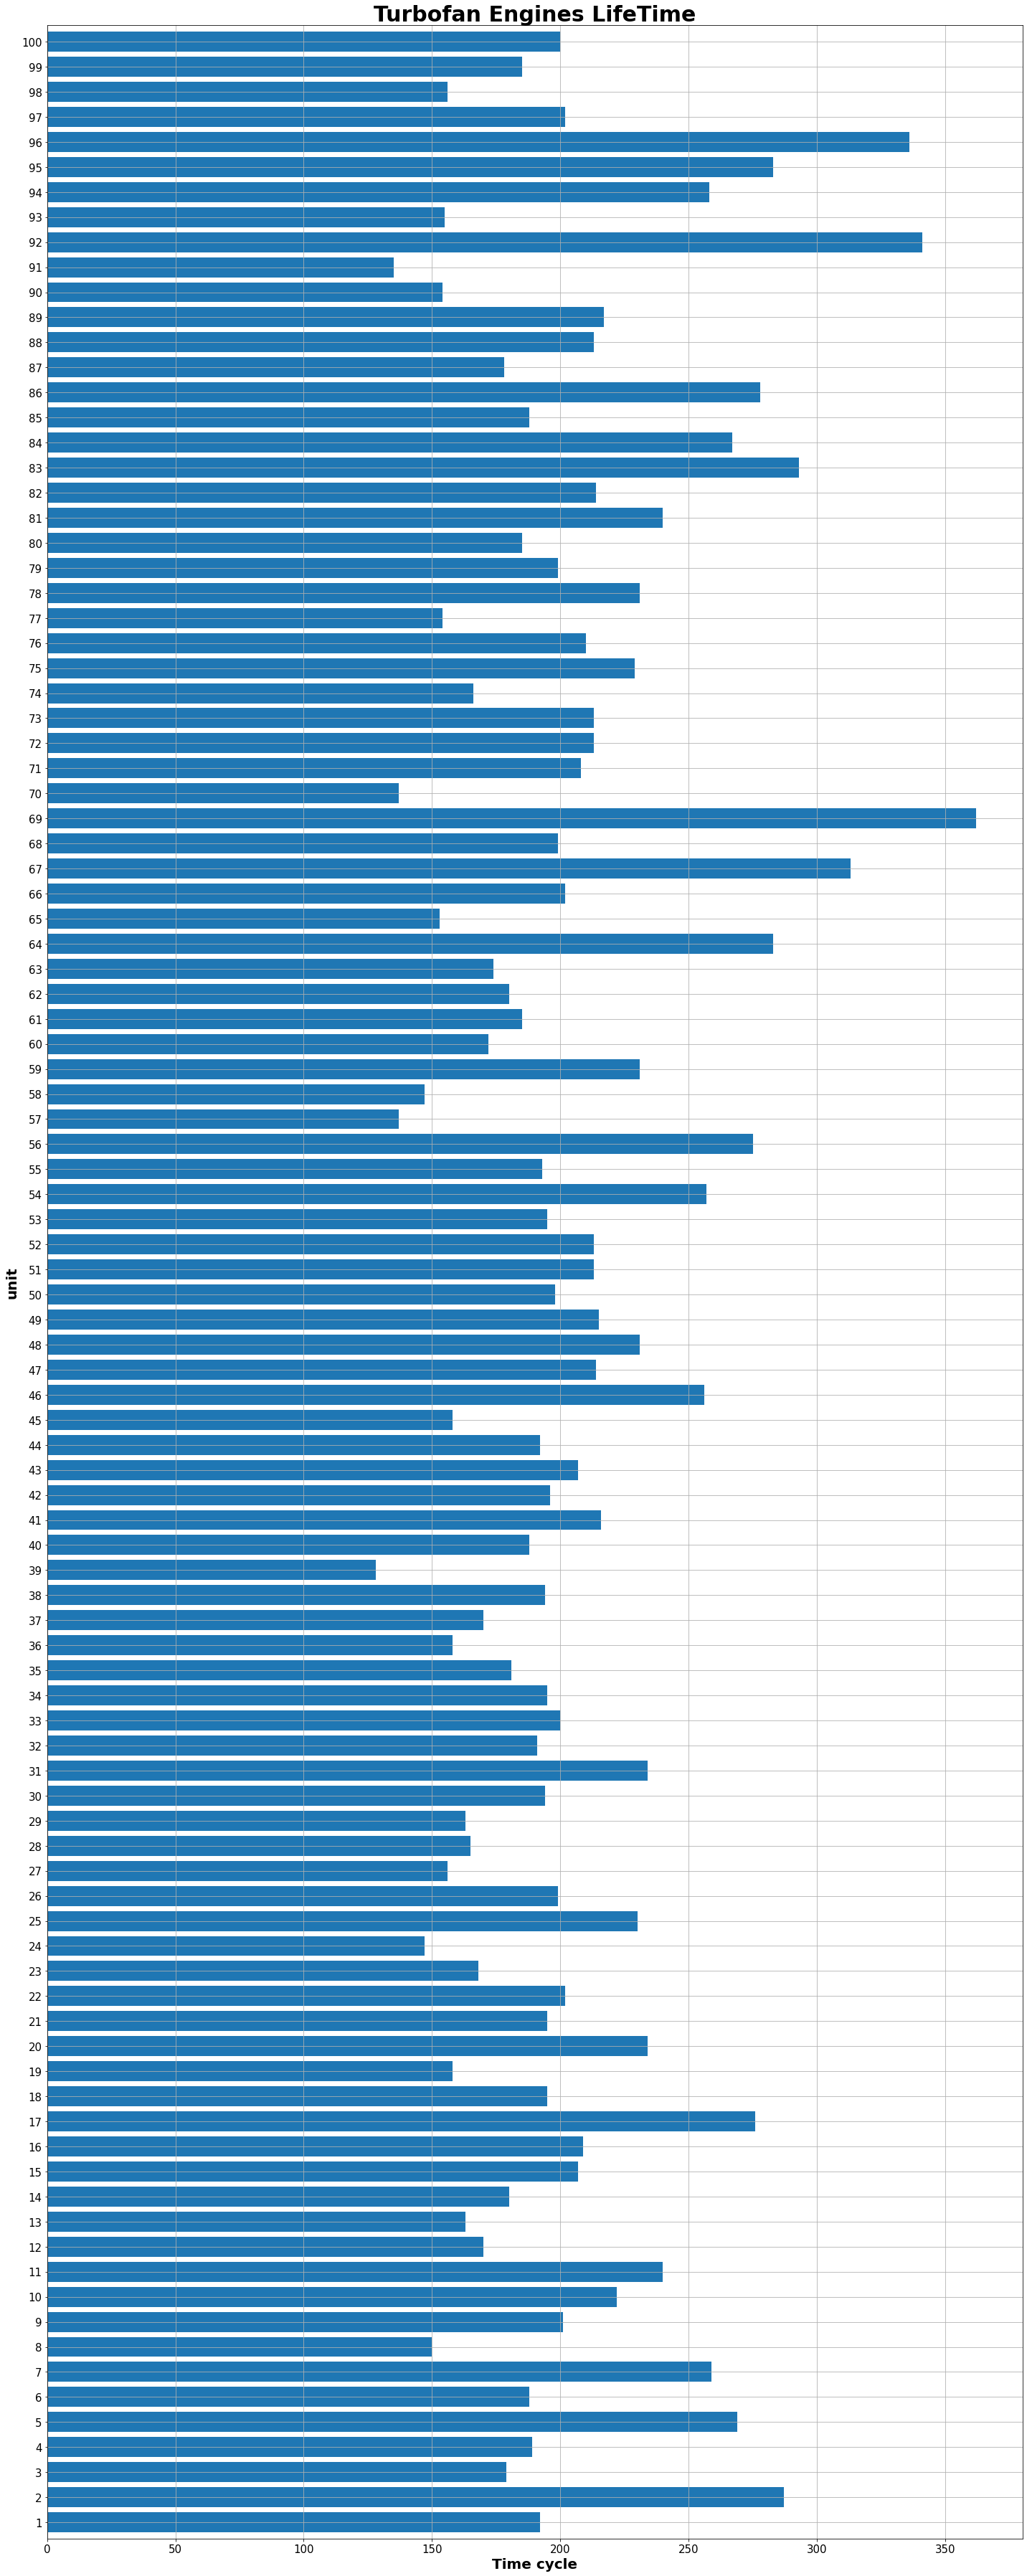

In [75]:
max_time_cycles=train.groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='time_cycles', ylabel='Density'>

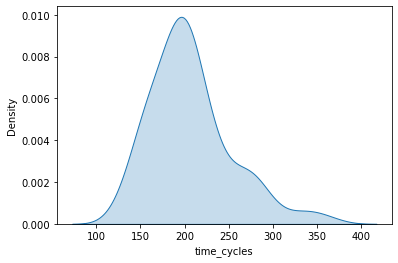

In [76]:
#Distribution of maximum time cycles
max_time_cycles=train.groupby('unit_number').max()
sns.kdeplot(data=max_time_cycles["time_cycles"],fill=True)

#### RUL corresponds to the remaining time cycles for each unit before it fails.

In [77]:
y_valid

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [78]:
 train_grouped_by_unit = train.groupby(by='unit_number') 
max_time_cycles = train_grouped_by_unit['time_cycles'].max()

In [79]:
train = train.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)

In [80]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,max_time_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192


In [81]:
 train["RUL"] = train["max_time_cycle"] - train['time_cycles']

In [82]:
train = train.drop("max_time_cycle", axis=1)

In [83]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [84]:
train.tail()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522,0


In [85]:
corr=train.corr()

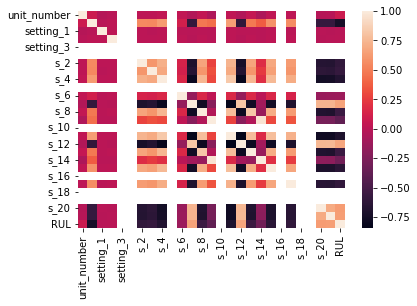

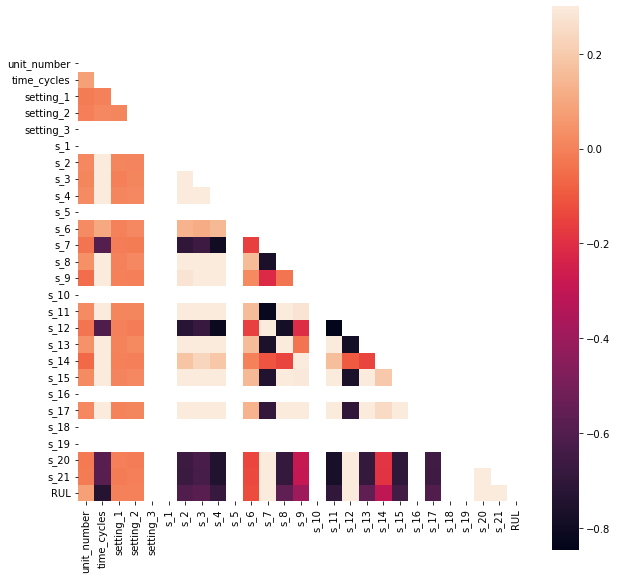

In [86]:
sns.heatmap(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [87]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
X_train=train.drop(columns=["unit_number","time_cycles","setting_1","setting_2","setting_3"],axis=1).copy()

In [90]:
X_train.head()

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'],
                                                  test_size=0.3, random_state=42)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)


In [93]:
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)

In [94]:
X_train_s

array([[0.        , 0.55792683, 0.47915243, ..., 0.        , 0.41085271,
        0.67144061],
       [0.        , 0.29268293, 0.22055138, ..., 0.        , 0.72868217,
        0.66610503],
       [0.        , 0.25609756, 0.34654819, ..., 0.        , 0.63565891,
        0.57329402],
       ...,
       [0.        , 0.38109756, 0.68056505, ..., 0.        , 0.47286822,
        0.64855378],
       [0.        , 0.20731707, 0.15926179, ..., 0.        , 0.72093023,
        0.6727043 ],
       [0.        , 0.2804878 , 0.4456596 , ..., 0.        , 0.79069767,
        0.71889919]])

In [95]:
X_test_s

array([[0.        , 0.32817337, 0.29051647, ..., 0.        , 0.76576577,
        0.48698939],
       [0.        , 0.6873065 , 0.74799644, ..., 0.        , 0.35135135,
        0.19276058],
       [0.        , 0.33126935, 0.34216385, ..., 0.        , 0.68468468,
        0.66201483],
       ...,
       [0.        , 0.40866873, 0.63134461, ..., 0.        , 0.7027027 ,
        0.58932984],
       [0.        , 0.39628483, 0.45191451, ..., 0.        , 0.69369369,
        0.61186219],
       [0.        , 0.51702786, 0.49243099, ..., 0.        , 0.62162162,
        0.4568978 ]])

In [96]:
y_train

12862     54
9936     185
12025    101
14526     24
16747    137
        ... 
11284    107
11964    162
5390      74
860      255
15795    157
Name: RUL, Length: 14441, dtype: int64

## Model Building

### Train the Model (all features)

## Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [98]:
lr_regression =LinearRegression() # build the obect of Model
lr_regression.fit(X_train_s,y_train)  # training the model with training data

LinearRegression()

### Testing and Training Data Evolution

In [99]:
#training
y_pred_train=lr_regression.predict(X_train_s)
residual=y_pred_train-y_train
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae  = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
rmse = np.sqrt(mse)
print("RMSE",rmse)
r2 = r2_score(y_train,y_pred_train)
print("R2",r2)

MSE 2006.9871572526783
MAE 34.172385936531626
RMSE 44.7994102333131
R2 0.583093872579288


In [100]:
#testing
y_pred_test=lr_regression.predict(X_test_s)
mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae  = mean_absolute_error(y_test,y_pred_test)
print("MAE",mae)
rmse = np.sqrt(mse)
print("RMSE",rmse)
r2 = r2_score(y_test,y_pred_test)
print("R2",r2)

MSE 2125.0367978151826
MAE 34.41821015467765
RMSE 46.09812141308128
R2 0.5360561298414108


## Support Vector Machine (SVR)

In [101]:
from sklearn.svm import SVR

In [102]:
SVM_regressor=SVR() # build the obect of Model
SVM_regressor.fit(X_train_s,y_train)  # training the model with training data

SVR()

### Testing and Training Data Evolution

In [103]:
#training
y_pred_train=SVM_regressor.predict(X_train_s)
residual=y_pred_train-y_train
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae  = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
rmse = np.sqrt(mse)
print("RMSE",rmse)
r2 = r2_score(y_train,y_pred_train)
print("R2",r2)

MSE 1897.8643220591434
MAE 30.77506888318432
RMSE 43.56448464126648
R2 0.605761670162996


In [104]:
#testing
y_pred_test=SVM_regressor.predict(X_test_s)
mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae  = mean_absolute_error(y_test,y_pred_test)
print("MAE",mae)
rmse = np.sqrt(mse)
print("RMSE",rmse)
r2 = r2_score(y_test,y_pred_test)
print("R2",r2)

MSE 2234.186730553364
MAE 33.16197372258439
RMSE 47.26718449996111
R2 0.5122262167433573


## Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
rf_regressor=RandomForestRegressor()
rf_regressor.fit(X_train_s,y_train)

RandomForestRegressor()

### Testing and Training Data Evolution

In [107]:
#training
y_pred_train=lr_regression.predict(X_train_s)
residual=y_pred_train-y_train
mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae  = mean_absolute_error(y_train,y_pred_train)
print("MAE",mae)
rmse = np.sqrt(mse)
print("RMSE",rmse)
r2 = r2_score(y_train,y_pred_train)
print("R2",r2)

MSE 2006.9871572526783
MAE 34.172385936531626
RMSE 44.7994102333131
R2 0.583093872579288


In [108]:
#testing
y_pred_test=lr_regression.predict(X_test_s)
mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae  = mean_absolute_error(y_test,y_pred_test)
print("MAE",mae)
rmse = np.sqrt(mse)
print("RMSE",rmse)
r2 = r2_score(y_test,y_pred_test)
print("R2",r2)

MSE 2125.0367978151826
MAE 34.41821015467765
RMSE 46.09812141308128
R2 0.5360561298414108


### observation
All model gives overfitting issue, so we have to do hyperparameter tunning for each model and 
check best parameter for best model accuracy.

In [112]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [133]:
print('maximum of y_train : ',y_train.max())
print('maximum of y_test : ',y_test.max())
print('maximum of y_valid : ',y_valid.max())

maximum of y_train :  361
maximum of y_test :  360
maximum of y_valid :  RUL    145
dtype: int64


In [149]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_18', 's_19']
X_train_2=X_train.drop(columns=drop_labels2, axis=1)    # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)      # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_s)             #scaling X_train_2
X_test_2_s=scaler.fit_transform(X_test_2)               #scaling X_test_2
y_train_clip=y_train.clip(upper=195)                    #Clipping y_train to have 195 as the maximum value 
X_valid_2=X_train.drop(columns=drop_labels2, axis=1)    # drop the constant columns from the validation dataset
X_valid_2_s=scaler.fit_transform(X_train_s)             #scaling X_valid_2